# Mutual Information

Use of the Mutual Information Function to select the characteristics of a database

[Example](https://github.com/atulpatelDS/Youtube/blob/main/Feature_Engineering/Feature%20Selection%20using%20Mutual%20Information%20-%20Tutorial%206.ipynb)

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif


### Dataset

Carga del dataset

[dataset de cancer](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download)

In [111]:
dataset_ = pd.read_csv("../datasets/breast-cancer.csv")

dataset_.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### Transform the output to numerical output

In [112]:
# clean data
dataset = dataset_.dropna()

# convert categorical 'Origin' data into one-hot data
origin = dataset.pop('diagnosis')
dataset['diagOut'] = (origin == 'M')*1
# dataset['mediana'] = (origin == 2)*1
# dataset['grande'] = (origin == 3)*1

dataset.head(5)
   

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagOut
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Separacion de los datos entre entradas y salidas



In [113]:
# Separacion de datos entre entradas y salidas

X_ = dataset.drop(columns=['id', 'diagOut'])

X_.tail()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [114]:
# Seleccion de datos de salida

y_ = dataset.get(['diagOut'])

y_.tail()

,diagOut
564,1
565,1
566,1
567,1
568,0


### Calculo de la entropia

Para calcular la entropia, es necesario calcular la probabilidad de un conjunto de datos, eso se hace al realizar el histograma de los datos, mirar la frecuencia muestral de cada uno de los beans con respecto al total de los datos



In [161]:
# plt.plot(np.sort(mutual_info_classif(X_,y_)))

# Calculo de la frecuencia muestral por columna

def entropy_fab(data, nbins=10):
    H_ = []
    for column in data: # para cada columna en X_
        h_array = np.histogram(data[column], bins = nbins) # se calcula el histograma para cada columna
        freq = h_array[0] # calculo de la frecuencia muestral por bin
        p = (freq)/np.sum(freq) # calculo de la probabilidad de ocurrencia de los datos el +1 es para asegurar que por lo menos hay un dato
        Hx_local = -np.sum(p*np.log2(p, out=np.zeros_like(p), where=(p!=0))) # calculo de la entropia de Shannon
        H_.append(Hx_local)

    return np.array(H_)


In [162]:
HX = entropy_fab(X_)
HY = entropy_fab(y_)
print("Entropía H(X): ", HX)
print("Entropía H(Y): ", HY)

print("Entropía H(X) + H(Y): ", HX + HY)

Entropía H(X):  [2.63478326 2.556026   2.63280141 2.28513974 2.39243439 2.56571652
 2.46529344 2.6318513  2.49736946 2.45364011 1.49329356 2.14875562
 1.38452669 0.9050521  1.86266426 2.15899739 1.09506981 2.12134207
 2.01203266 1.37406049 2.63210417 2.72693592 2.59126591 2.12360793
 2.63213402 2.41465718 2.50219709 3.08237047 2.21570671 2.11712628]
Entropía H(Y):  [0.95263512]
Entropía H(X) + H(Y):  [3.58741838 3.50866113 3.58543653 3.23777487 3.34506951 3.51835164
 3.41792857 3.58448642 3.45000458 3.40627523 2.44592868 3.10139074
 2.33716182 1.85768722 2.81529938 3.11163251 2.04770493 3.07397719
 2.96466778 2.32669561 3.58473929 3.67957104 3.54390104 3.07624305
 3.58476914 3.3672923  3.45483221 4.0350056  3.16834183 3.0697614 ]


### Calculo de la entropia conjunta

[Link](https://hmong.es/wiki/Joint_entropy)

Si $px = 0$, entonces $px*\log_2{(px)}=0$ en el limite

[Justificacion](https://math.stackexchange.com/questions/3975323/conditional-entropy-how-to-deal-with-zero-valued-probabilities)

In [159]:
# Calculo de la frecuencia muestral por columna

def joint_entropy_fab(dataX, dataY, nbins=10):
    H_ = []
    columnY = dataY.columns[0]

    for columnX in dataX: # para cada columna en X_

        h_array = np.histogram2d(dataX[columnX], dataY[columnY], bins = nbins) # se calcula el histograma para cada columna
        freq = h_array[0] # calculo de la frecuencia muestral por bin
        p = (freq)/np.sum(freq) # calculo de la probabilidad de ocurrencia de los datos el +1 es para asegurar que por lo menos hay un dato
        Hxy_local = -np.sum(p*np.log2(p, out=np.zeros_like(p), where=(p!=0))) # calculo de la entropia de Shannon, # 0*log2(0) = 0 in the limit 
        H_.append(Hxy_local)

    return np.array(H_)

In [160]:
HXY = joint_entropy_fab(X_, y_)

print("Entropía H(X,Y): ", HXY)

Entropía H(X,Y):  [3.0690806  3.32429061 3.034475   2.74942429 3.23135564 3.20346893
 2.91615853 2.97168797 3.35634505 3.37543318 2.1279957  3.08339624
 2.03346528 1.5641429  2.79362095 3.01174232 1.9823697  2.89532086
 2.92001737 2.29019936 2.97258854 3.48889086 2.90612687 2.51119073
 3.43592857 3.07163004 2.99728113 3.39316607 3.03208984 2.98391678]


### Entropias condicionales

In [163]:
print("H(X|Y): ", HXY-HY)

H(X|Y):  [2.11644548 2.37165548 2.08183988 1.79678916 2.27872052 2.25083381
 1.96352341 2.01905284 2.40370993 2.42279806 1.17536058 2.13076111
 1.08083016 0.61150778 1.84098583 2.05910719 1.02973458 1.94268574
 1.96738225 1.33756424 2.01995341 2.53625573 1.95349175 1.55855561
 2.48329345 2.11899491 2.04464601 2.44053095 2.07945472 2.03128166]


In [164]:
print("H(Y|X): ", HXY-HX)

H(Y|X):  [0.43429734 0.7682646  0.40167359 0.46428454 0.83892125 0.63775241
 0.45086509 0.33983667 0.8589756  0.92179308 0.63470214 0.93464062
 0.64893859 0.6590908  0.93095669 0.85274492 0.88729989 0.77397879
 0.90798472 0.91613888 0.34048436 0.76195494 0.31486096 0.3875828
 0.80379455 0.65697286 0.49508405 0.3107956  0.81638313 0.86679051]


## Informacion Mutua

Informacion mutua IM(X,Y):  [0.51833778 0.18437052 0.55096153 0.48835058 0.11371388 0.31488271
 0.50177003 0.61279846 0.09365953 0.03084205 0.31793298 0.01799451
 0.30369653 0.29354432 0.02167843 0.0998902  0.06533523 0.17865633
 0.04465041 0.03649624 0.61215076 0.19068018 0.63777417 0.56505233
 0.14884057 0.29566226 0.45755108 0.64183953 0.13625199 0.08584462]


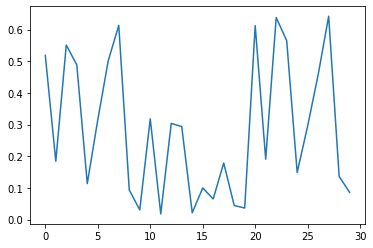

In [165]:
MIXY = HX + HY - HXY

print("Informacion mutua IM(X,Y): ", MIXY)

plt.plot(MIXY)

## Uso de la funcion de scikit

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


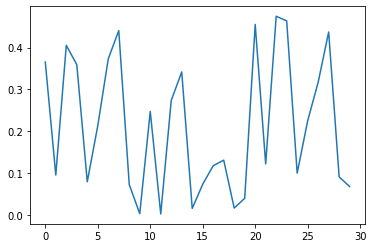

In [166]:
plt.plot(mutual_info_classif(X_,y_))

# Seleccion de caracteristicas

In [171]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [170]:
mrs_score = pd.Series(MIXY,index=X_.columns)
mrs_score.sort_values(ascending=False)

# plt.plot(mrs_score.sort_values(ascending=False))

concave points_worst       0.641840
perimeter_worst            0.637774
concave points_mean        0.612798
radius_worst               0.612151
area_worst                 0.565052
perimeter_mean             0.550962
radius_mean                0.518338
concavity_mean             0.501770
area_mean                  0.488351
concavity_worst            0.457551
radius_se                  0.317933
compactness_mean           0.314883
perimeter_se               0.303697
compactness_worst          0.295662
area_se                    0.293544
texture_worst              0.190680
texture_mean               0.184371
concave points_se          0.178656
smoothness_worst           0.148841
symmetry_worst             0.136252
smoothness_mean            0.113714
compactness_se             0.099890
symmetry_mean              0.093660
fractal_dimension_worst    0.085845
concavity_se               0.065335
symmetry_se                0.044650
fractal_dimension_se       0.036496
fractal_dimension_mean     0

In [169]:
mir = mutual_info_classif(X_,y_)
mir_score = pd.Series(mir,index=X_.columns)
mir_score.sort_values(ascending=False)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


perimeter_worst            0.476578
area_worst                 0.463210
radius_worst               0.454762
concave points_mean        0.439713
concave points_worst       0.435505
perimeter_mean             0.402580
concavity_mean             0.375178
radius_mean                0.367228
area_mean                  0.358496
area_se                    0.342245
concavity_worst            0.314962
perimeter_se               0.276069
radius_se                  0.250088
compactness_worst          0.224761
compactness_mean           0.213836
concave points_se          0.126541
texture_worst              0.121192
concavity_se               0.117876
smoothness_worst           0.100499
texture_mean               0.096685
symmetry_worst             0.089848
smoothness_mean            0.085810
compactness_se             0.077203
fractal_dimension_worst    0.071471
symmetry_mean              0.059516
fractal_dimension_se       0.040096
symmetry_se                0.017258
smoothness_se              0

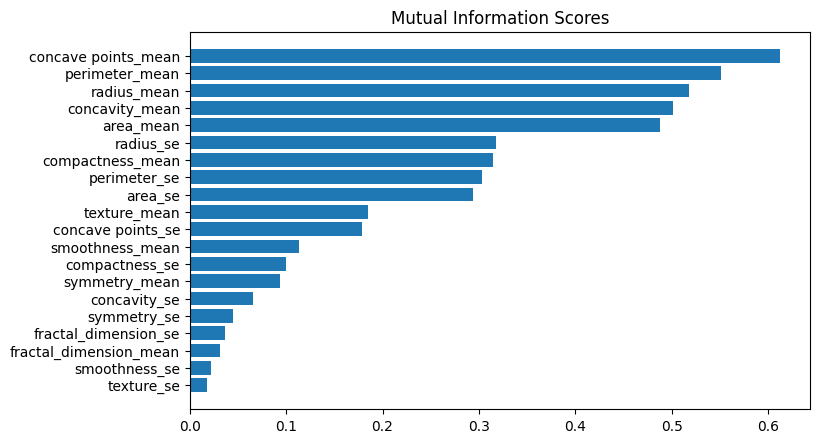

In [173]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mrs_score.head(20))

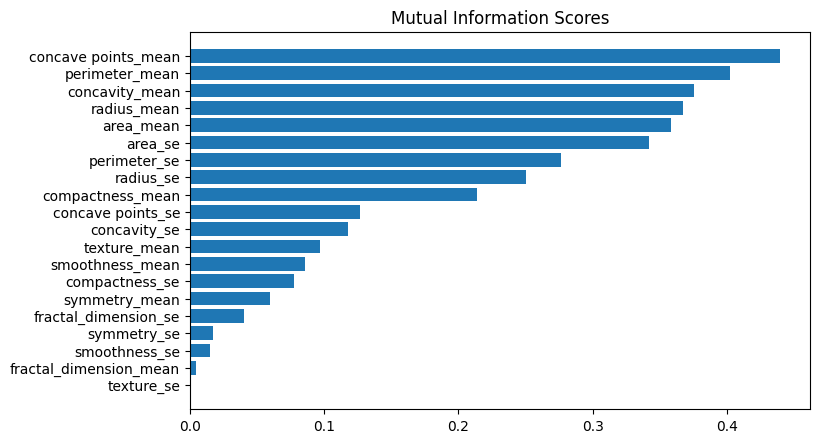

In [174]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mir_score.head(20))